# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [142]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing

In [143]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [144]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [145]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [146]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [147]:
df = pd.read_csv('./Datasets/kidney_disease.csv', index_col=0)
df.dropna(axis=0, how='any')
#df.loc[230, 'classification']
#df.head(10)
#df.dtypes
df.loc[:, 'wc'] = pd.to_numeric(df.loc[:, 'wc'], errors='coerce')
df.loc[:, 'rc'] = pd.to_numeric(df.loc[:, 'rc'], errors='coerce')
df.tail(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,52,6300.0,5.3,no,no,no,good,no,no,notckd
391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,85.0,...,44,5800.0,6.3,no,no,no,good,no,no,notckd
392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,...,46,6600.0,5.5,no,no,no,good,no,no,notckd
393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,117.0,...,54,7400.0,5.4,no,no,no,good,no,no,notckd
394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,137.0,...,45,9500.0,4.6,no,no,no,good,no,no,notckd
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200.0,5.9,no,no,no,good,no,no,notckd


In [148]:
#dropcolumns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#columns = ['bgr', 'wc', 'rc', 'classification']
#df1.dtypes
df = df.dropna(axis=0, how='any')
#df1 = df1.reset_index()
#df1 = df.drop(dropcolumns, axis=1)
df.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
22,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32,6900.0,3.4,yes,no,no,good,no,yes,ckd
27,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,264.0,...,37,9600.0,4.1,yes,yes,yes,good,yes,no,ckd
48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,70.0,...,29,18900.0,3.5,yes,yes,no,good,yes,no,ckd
58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,253.0,...,33,7200.0,4.3,yes,yes,yes,good,no,no,ckd


In [149]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [150]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
22,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32,6900.0,3.4,yes,no,no,good,no,yes,ckd
27,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,264.0,...,37,9600.0,4.1,yes,yes,yes,good,yes,no,ckd
48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,70.0,...,29,18900.0,3.5,yes,yes,no,good,yes,no,ckd
58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,253.0,...,33,7200.0,4.3,yes,yes,yes,good,no,no,ckd


<IPython.core.display.Javascript object>


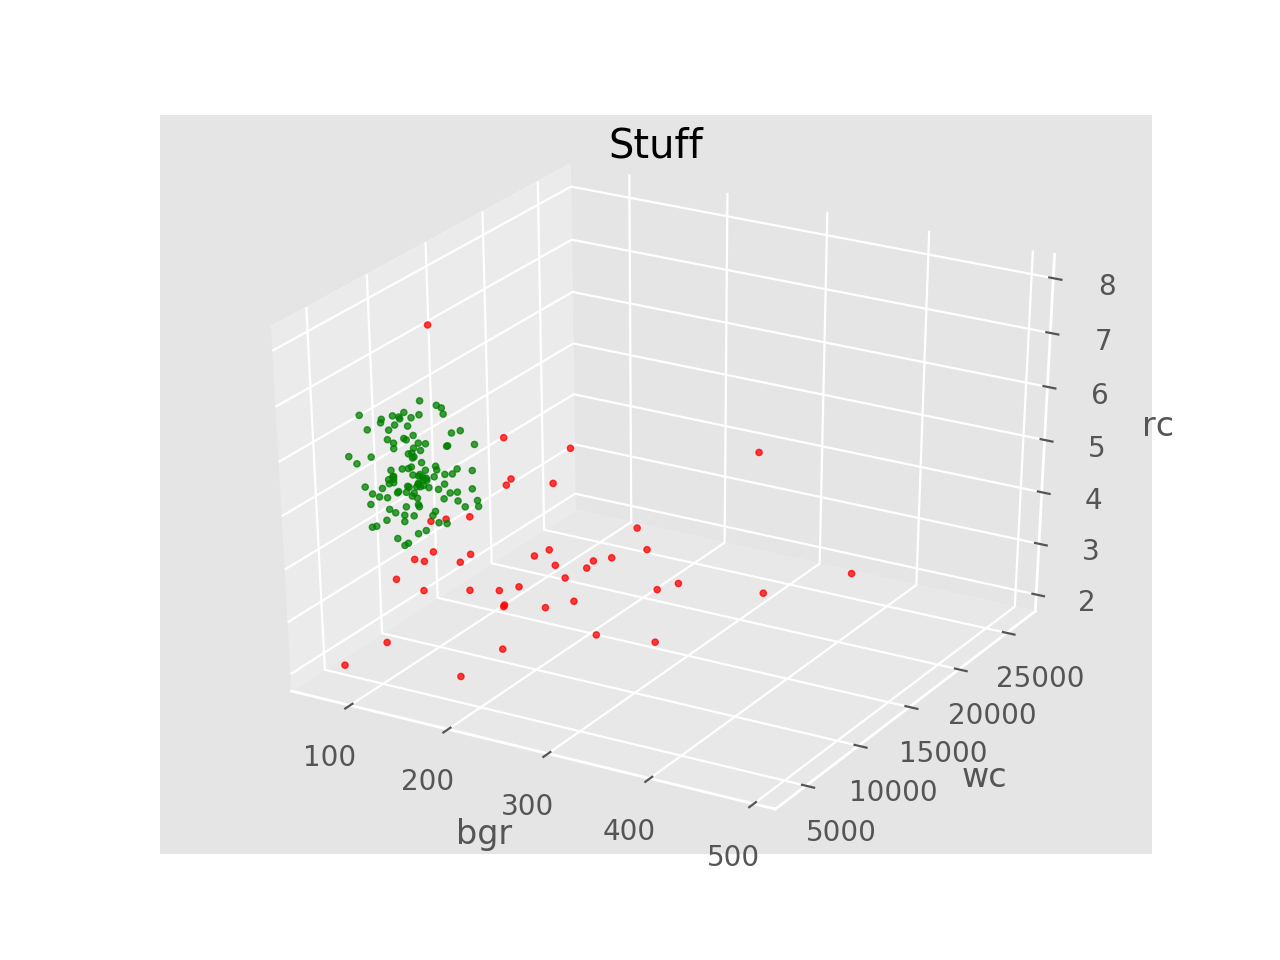

In [151]:
# Magic command, works inside jupyter notebooks
# This includes an interactive control/renderer and does not require plt.show()
%matplotlib notebook

# Render the dataset with labels

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Stuff')
ax.set_xlabel('bgr')
ax.set_ylabel('wc')
ax.set_zlabel('rc')
ax.scatter(df1.bgr, df1.wc, df1.rc, c=labels, marker='.', alpha=0.75)

plt.show()

In [152]:
dropcolumns = ['classification']
#df1.dtypes
#df1 = df1.dropna(axis=0, how='any')
#df1 = df1.reset_index()
df1 = df.drop(dropcolumns, axis=1)
df1.reset_index()
df1.tail(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
379,62.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,78.0,...,16.1,50,5400.0,5.7,no,no,no,good,no,no
380,59.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,113.0,...,15.3,54,6500.0,4.9,no,no,no,good,no,no
382,48.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.8,51,6000.0,6.5,no,no,no,good,no,no
383,80.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,119.0,...,13.9,49,5100.0,5.0,no,no,no,good,no,no
384,57.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,132.0,...,15.4,42,11000.0,4.5,no,no,no,good,no,no
385,63.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,113.0,...,16.5,52,8000.0,5.1,no,no,no,good,no,no
386,46.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,16.4,43,5700.0,6.5,no,no,no,good,no,no
387,15.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,93.0,...,16.7,50,6200.0,5.2,no,no,no,good,no,no
388,51.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,94.0,...,15.5,46,9500.0,6.4,no,no,no,good,no,no


In [153]:
boolcolumns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df1 = pd.get_dummies(df1,columns=boolcolumns)
df1.head(10)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,0,1,0,1,0,1
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,1,0,0,1,1,0,0,1
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,1,0,0,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,0,1,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,0,1
22,48.0,80.0,1.025,4.0,0.0,95.0,163.0,7.7,136.0,3.8,...,1,0,1,0,1,0,1,0,0,1
27,69.0,70.0,1.010,3.0,4.0,264.0,87.0,2.7,130.0,4.0,...,0,1,0,1,1,0,0,1,1,0
48,73.0,70.0,1.005,0.0,0.0,70.0,32.0,0.9,125.0,4.0,...,0,1,1,0,1,0,0,1,1,0
58,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,0,1,0,1,1,0,1,0,1,0


In [154]:
# .. your (possible) code adjustment here ..
if scaleFeatures: df1 = scaleFeaturesDF(df1)
    
df1.var()

New Variances:
 age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64
New Describe:
                 age            bp   

age               1.006369
bp                1.006369
sg                1.006369
al                1.006369
su                1.006369
bgr               1.006369
bu                1.006369
sc                1.006369
sod               1.006369
pot               1.006369
hemo              1.006369
pcv               1.006369
wc                1.006369
rc                1.006369
rbc_abnormal      1.006369
rbc_normal        1.006369
pc_abnormal       1.006369
pc_normal         1.006369
pcc_notpresent    1.006369
pcc_present       1.006369
ba_notpresent     1.006369
ba_present        1.006369
htn_no            1.006369
htn_yes           1.006369
dm_no             1.006369
dm_yes            1.006369
cad_no            1.006369
cad_yes           1.006369
appet_good        1.006369
appet_poor        1.006369
pe_no             1.006369
pe_yes            1.006369
ane_no            1.006369
ane_yes           1.006369
dtype: float64

<IPython.core.display.Javascript object>


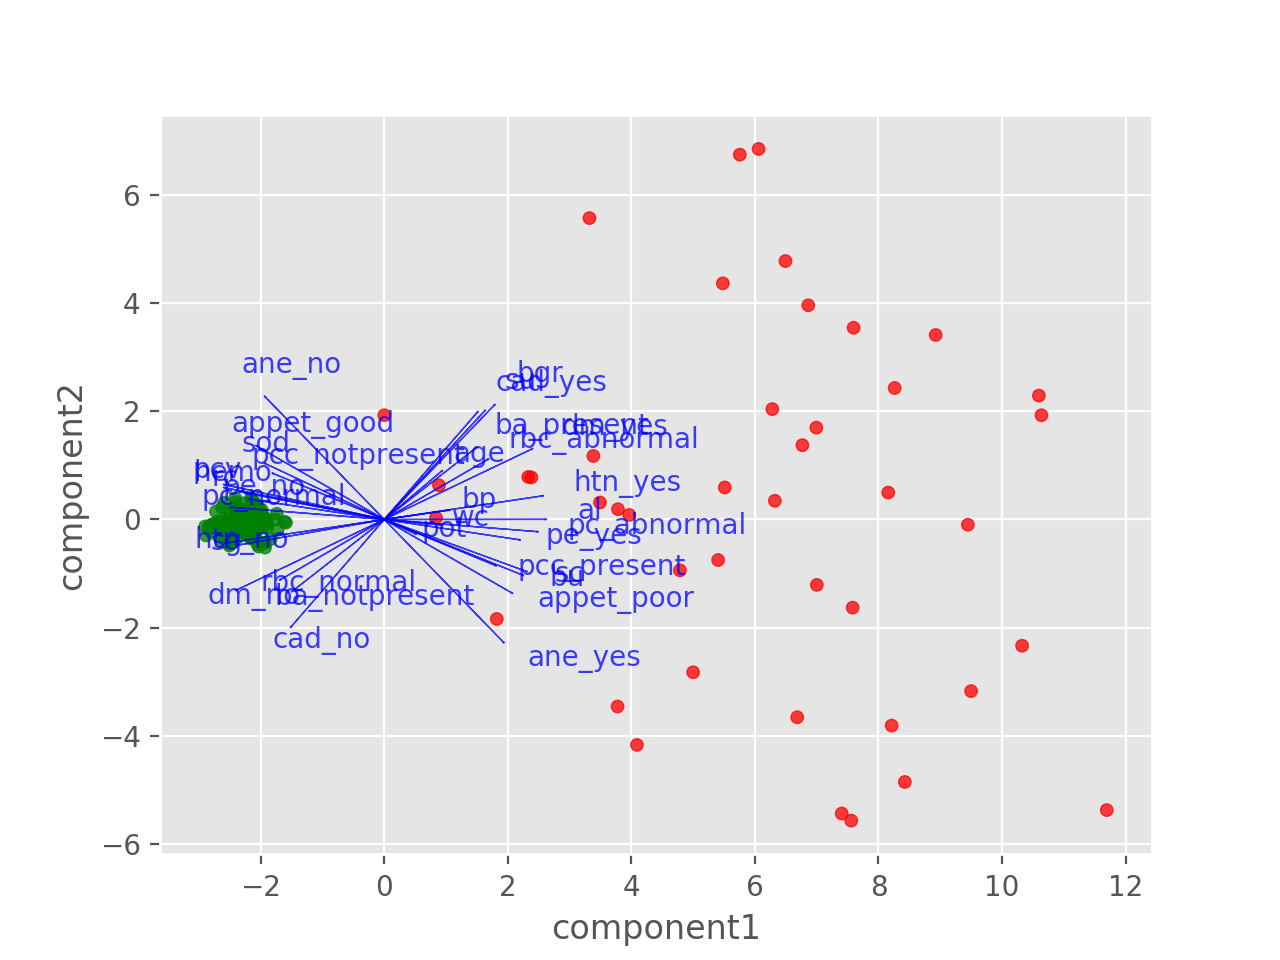

In [155]:
# Magic command, works inside jupyter notebooks
# This includes an interactive control/renderer and does not require plt.show()
%matplotlib notebook

# Render the dataset with labels

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Stuff')
ax.set_xlabel('bgr')
ax.set_ylabel('wc')
ax.set_zlabel('rc')
ax.scatter(df1.bgr, df1.wc, df1.rc, c=labels, marker='.', alpha=0.75)

plt.show()

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df1)

T = pca.transform(df1)

In [157]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df1.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

Features by importance:
 [(2.9696150394993315, 'ane_yes'), (2.9696150394993315, 'ane_no'), (2.758875925894977, 'bgr'), (2.715504955394058, 'dm_yes'), (2.715504955394058, 'dm_no'), (2.658932094139238, 'pcv'), (2.645572100109873, 'hemo'), (2.602112662848508, 'al'), (2.5934172193046914, 'htn_yes'), (2.593417219304691, 'htn_no'), (2.5767305659998647, 'su'), (2.4859440233443384, 'cad_no'), (2.485944023344338, 'cad_yes'), (2.4841324281325425, 'sc'), (2.479471113704939, 'pc_normal'), (2.4794711137049386, 'pc_abnormal'), (2.4651094161860523, 'appet_poor'), (2.4651094161860523, 'appet_good'), (2.457566506085092, 'bu'), (2.393726969612573, 'sg'), (2.3881975796285326, 'rc'), (2.210578246131016, 'pe_yes'), (2.210578246131016, 'pe_no'), (2.182818062607649, 'sod'), (2.005926150817527, 'rbc_normal'), (2.005926150817527, 'rbc_abnormal'), (1.9861731688066915, 'ba_notpresent'), (1.9861731688066913, 'ba_present'), (1.984291131907197, 'pcc_present'), (1.9842911319071965, 'pcc_notpresent'), (1.284679677156